<a href="https://colab.research.google.com/github/shivani-2/Employee-Resign-Prediction/blob/master/Employee_Resign_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MEMBER INFO
This assignment was done by:

Group ID: gRsBiKd66

Shivani Shenai (User ID: z-k0LeOej)

Sagarika Raje (User ID: ORTBNrVGR)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing Dataset


In [ ]:
general_data = pd.read_csv('/content/drive/MyDrive/hr analytics/general_data.csv')
employee_survey_data = pd.read_csv('/content/drive/MyDrive/hr analytics/employee_survey_data.csv')
manager_survey_data = pd.read_csv('/content/drive/MyDrive/hr analytics/manager_survey_data.csv')

In [ ]:
print(general_data.shape , employee_survey_data.shape , manager_survey_data.shape)
print(employee_survey_data.columns.tolist())
print(manager_survey_data.columns.tolist())

(4410, 24) (4410, 4) (4410, 3)
['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
['EmployeeID', 'JobInvolvement', 'PerformanceRating']


#Preprocessing
For our dataset, we first decided to get rid of null values, if any. We then merged the multiple datasets provided, on the common column ie. 'EmployeeID'

After this, we ran a simple Exploratory Data Analysis to give us an idea of the factors which really take part in determining the Employee Resign Prediction

We then went on to splitting our dataset in a 75:25 ratio (75% data forms the training set and 25% data forms the test set) after which we encoded the categorical data and applied feature scaling.

##Cleaning the Data

###BEFORE

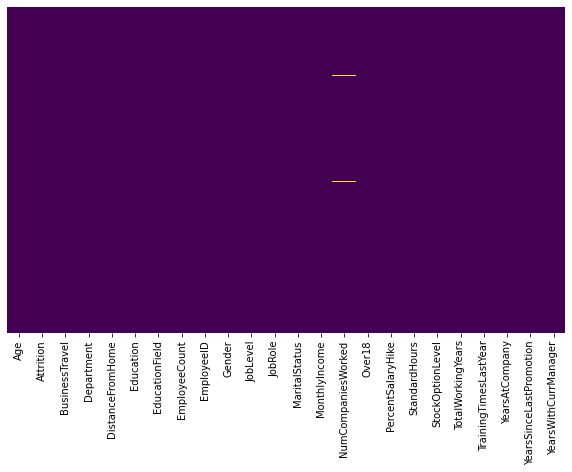

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(general_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

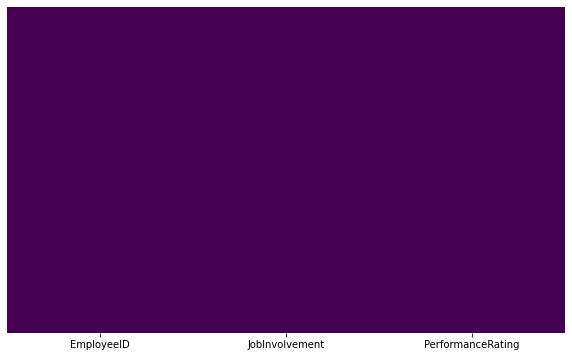

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(manager_survey_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

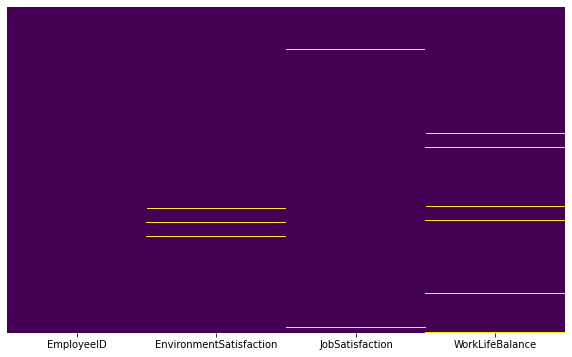

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(employee_survey_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
general_data['NumCompaniesWorked'].fillna(value=general_data['NumCompaniesWorked'].mean(), inplace=True)
general_data['TotalWorkingYears'].fillna(value=general_data['TotalWorkingYears'].mean(), inplace=True)
employee_survey_data['EnvironmentSatisfaction'].fillna(value=employee_survey_data['EnvironmentSatisfaction'].mean(), inplace=True)
employee_survey_data['JobSatisfaction'].fillna(value=employee_survey_data['JobSatisfaction'].mean(), inplace=True)
employee_survey_data['WorkLifeBalance'].fillna(value=employee_survey_data['WorkLifeBalance'].mean(), inplace=True)

###AFTER

In [ ]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4410 non-null   float64
 2   JobSatisfaction          4410 non-null   float64
 3   WorkLifeBalance          4410 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [ ]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [ ]:
print(general_data.shape ,  employee_survey_data.shape ,  manager_survey_data.shape)
print(employee_survey_data.columns.tolist())
print(manager_survey_data.columns.tolist())

(4410, 24) (4410, 4) (4410, 3)
['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
['EmployeeID', 'JobInvolvement', 'PerformanceRating']


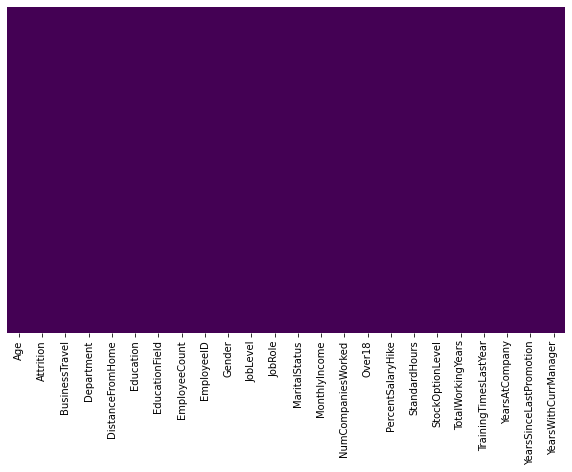

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(general_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

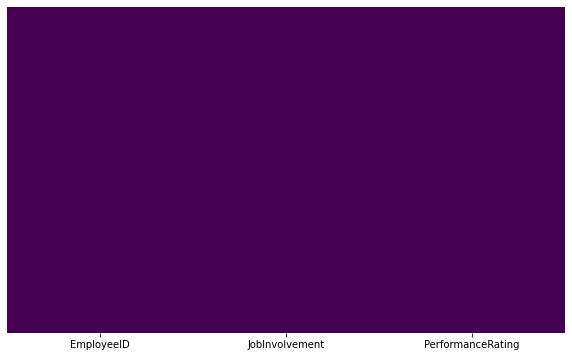

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(manager_survey_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

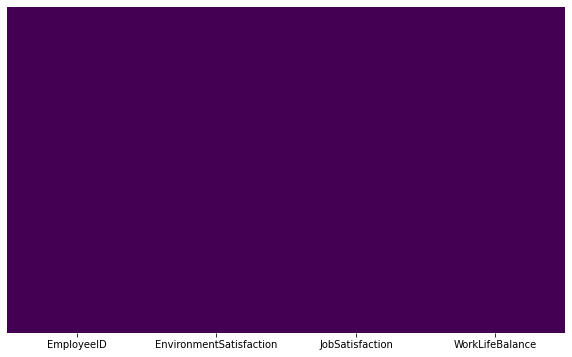

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(employee_survey_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##Merging the Datasets

In [ ]:
merge = pd.merge(employee_survey_data, manager_survey_data, on='EmployeeID')
dataset = pd.merge(general_data, merge, on='EmployeeID')
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

##Exploring the Data

In [ ]:
print('Total Attrition Number is', dataset.Attrition.value_counts()[1])

Total Attrition Number is 711


**AGE AND GENDER**

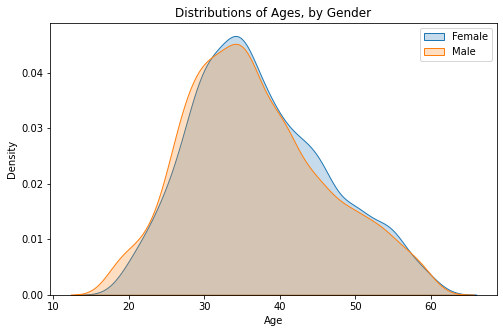

In [ ]:
female_age = dataset[dataset['Gender']=='Female']['Age']
male_age = dataset[dataset['Gender']=='Male']['Age']

plt.figure(figsize = (8,5))
sns.kdeplot(data=female_age, label="Female", shade=True)
sns.kdeplot(data=male_age, label="Male", shade=True)

plt.title("Distributions of Ages, by Gender")
plt.legend()
plt.show()

Age Distribution is balanced.

**DISTANCE FROM HOME**

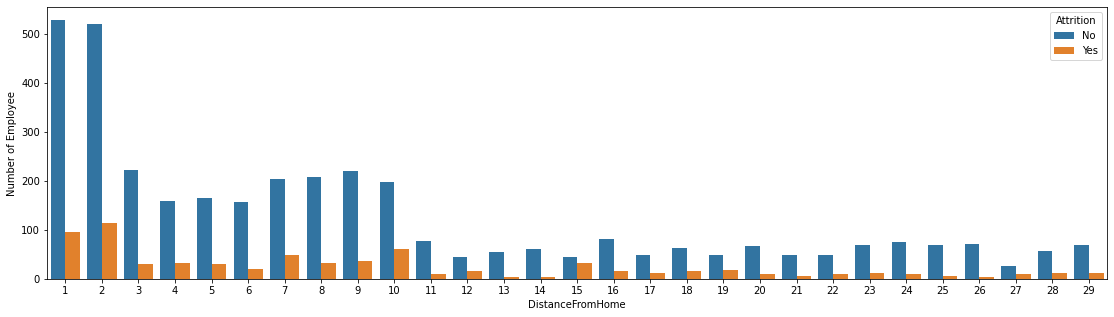

In [ ]:
plt.figure(figsize = (19,5))
sns.countplot(x = 'DistanceFromHome', data = dataset, hue='Attrition')
plt.ylabel('Number of Employee')
plt.show()

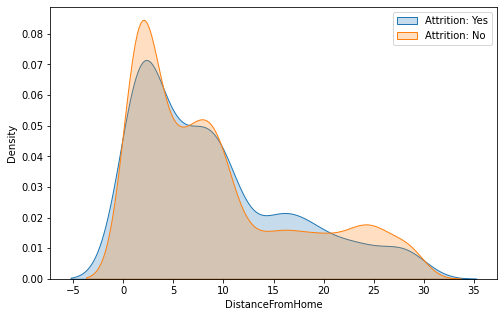

In [ ]:
dist_yes = dataset[dataset['Attrition']=='Yes']['DistanceFromHome']
dist_no = dataset[dataset['Attrition']=='No']['DistanceFromHome']

plt.figure(figsize = (8,5))
sns.kdeplot(data=dist_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=dist_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

Distance from home is not a factor that causes more Attrition.

**EDUCATION**

Text(0, 0.5, 'Number of Employee')

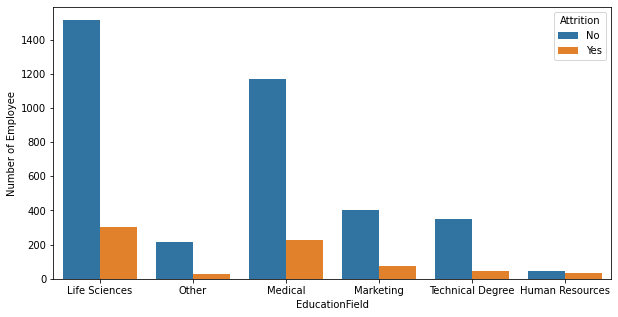

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'EducationField', data = dataset, hue='Attrition')
plt.ylabel('Number of Employee')

In [ ]:
edu = dataset['EducationField'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['EducationField'].value_counts()

edu_field_per = at_yes/edu*100

print(round(edu_field_per,2))

Human Resources     40.74
Life Sciences       16.67
Marketing           15.72
Medical             16.16
Other               12.20
Technical Degree    11.36
Name: EducationField, dtype: float64


Human resources has the highest ratio. 

**GENDER**

Text(0, 0.5, 'Number of Employee')

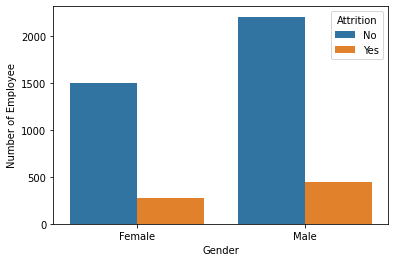

In [ ]:
sns.countplot(x = 'Gender', data = dataset, hue='Attrition')
plt.ylabel('Number of Employee')

In [ ]:
at_yes = dataset[dataset['Attrition']=='Yes']['Gender'].value_counts()

count_female = (dataset['Gender'] == 'Female').value_counts()[1]
fem_perc = (at_yes[1]/count_female)*100
count_male = (dataset['Gender'] == 'Male').value_counts()[1]
male_perc = (at_yes[0]/count_male)*100

print('Female Left Job Percentage:', round(fem_perc,3) , '%')
print('Male Left Job Percentage:', round(male_perc,3) , '%')

Female Left Job Percentage: 15.306 %
Male Left Job Percentage: 16.667 %


The ratio of males and females who left the job is approximately the same. 

**JOB LEVEL**

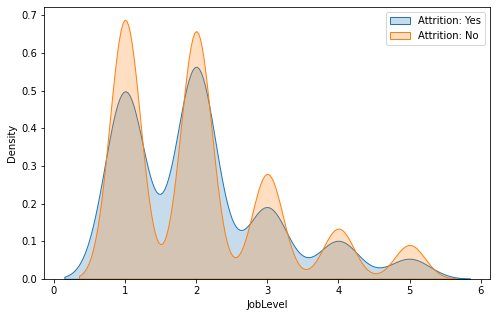

In [ ]:
job_level_yes = dataset[dataset['Attrition']=='Yes']['JobLevel']
job_level_no = dataset[dataset['Attrition']=='No']['JobLevel']

plt.figure(figsize = (8,5))
sns.kdeplot(data=job_level_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=job_level_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

In [ ]:
job_level_total = dataset['JobLevel'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['JobLevel'].value_counts()

job_level_perc = at_yes/job_level_total*100

print(round(job_level_perc,2))

1    15.47
2    17.79
3    14.68
4    16.04
5    13.04
Name: JobLevel, dtype: float64


Level 2 has the most number of attritions.

**JOB ROLE**

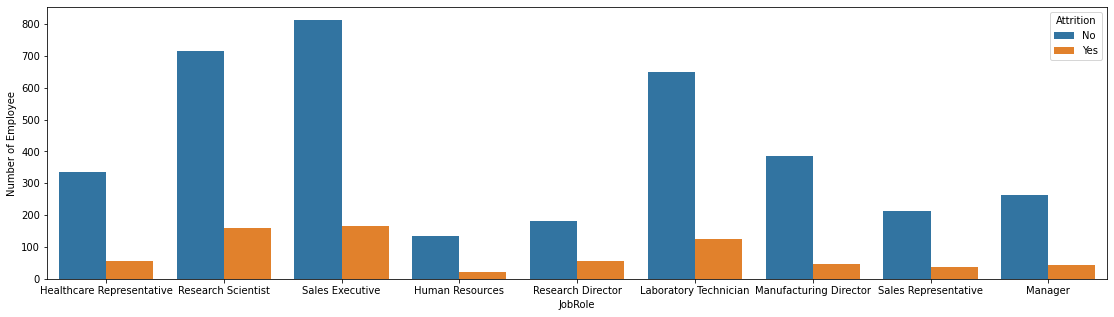

In [ ]:
plt.figure(figsize = (19,5))
sns.countplot(x = 'JobRole', data = dataset, hue='Attrition')
plt.ylabel('Number of Employee')
plt.show()

In [ ]:
edu = dataset['JobRole'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['JobRole'].value_counts()

job_role_per = at_yes/edu*100

print(round(job_role_per,2))

Healthcare Representative    14.50
Human Resources              13.46
Laboratory Technician        16.22
Manager                      13.73
Manufacturing Director       11.03
Research Director            23.75
Research Scientist           18.15
Sales Executive              16.87
Sales Representative         14.46
Name: JobRole, dtype: float64


The highest resign ratio here is that of a research director.

**MARITAL STATUS**

Text(0, 0.5, 'Number of Employee')

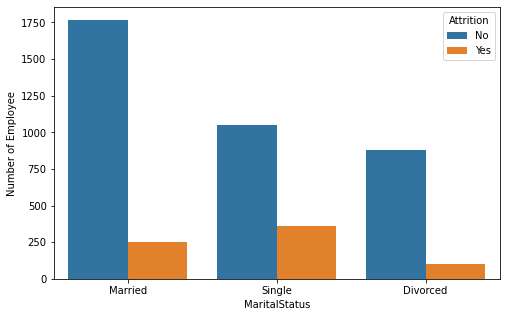

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='MaritalStatus', data = dataset, hue= 'Attrition')
plt.ylabel('Number of Employee')

In [ ]:
ms = dataset['MaritalStatus'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['MaritalStatus'].value_counts()

ms_perc = at_yes/ms*100

print(round(ms_perc,2))

Divorced    10.09
Married     12.48
Single      25.53
Name: MaritalStatus, dtype: float64


It is observed that employees who are single tend to leave the job more.

**MONTHLY INCOME**

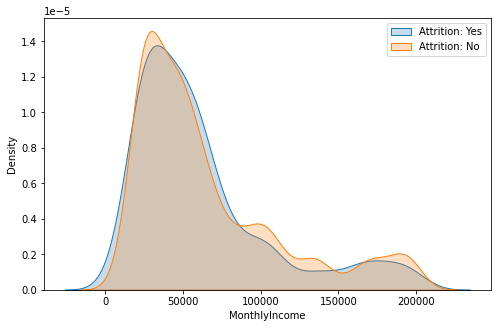

In [ ]:
monthly_inc_yes = dataset[dataset['Attrition']=='Yes']['MonthlyIncome']
monthly_inc_no = dataset[dataset['Attrition']=='No']['MonthlyIncome']

plt.figure(figsize = (8,5))
sns.kdeplot(data=monthly_inc_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=monthly_inc_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

In [ ]:
#Average Monthyly Salaries as per department

income_sales = dataset[dataset['Department']=='Sales']['MonthlyIncome']
income_RD = dataset[dataset['Department']=='Research & Development']['MonthlyIncome']
income_HR = dataset[dataset['Department']=='Human Resources']['MonthlyIncome']

print('Sales Dep. Average:',round(income_sales.mean()),2)
print('R&D Dep. Average:',round(income_RD.mean()),2)
print('Human Resources Dep. Average:',round(income_HR.mean()),2)

Sales Dep. Average: 61384 2
R&D Dep. Average: 67188 2
Human Resources Dep. Average: 57904 2


Human Resources Department has the least average monthly salary.

**NUMBER OF COMPANIES WORKED**

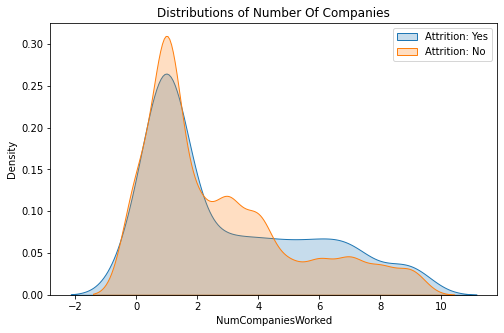

In [ ]:
num_com_yes = dataset[dataset['Attrition']=='Yes']['NumCompaniesWorked']
num_com_no = dataset[dataset['Attrition']=='No']['NumCompaniesWorked']

plt.figure(figsize = (8,5))
sns.kdeplot(data=num_com_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=num_com_no, label="Attrition: No", shade=True)

plt.title("Distributions of Number Of Companies")
plt.legend()
plt.show()

**TOTAL WORKING YEARS**

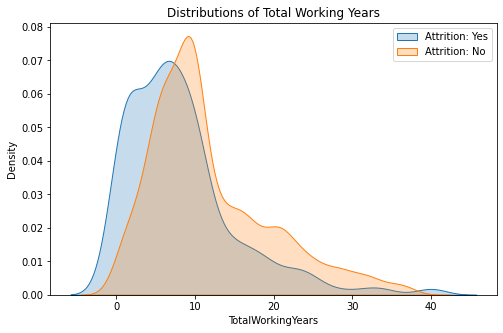

In [ ]:
work_year_yes = dataset[dataset['Attrition']=='Yes']['TotalWorkingYears']
work_year_no = dataset[dataset['Attrition']=='No']['TotalWorkingYears']

plt.figure(figsize = (8,5))
sns.kdeplot(data=work_year_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=work_year_no, label="Attrition: No", shade=True)

plt.title("Distributions of Total Working Years")
plt.legend()
plt.show()

The employees with the less total working years are more likely to leave the job.

**TRAINING TIMES LAST YEAR**

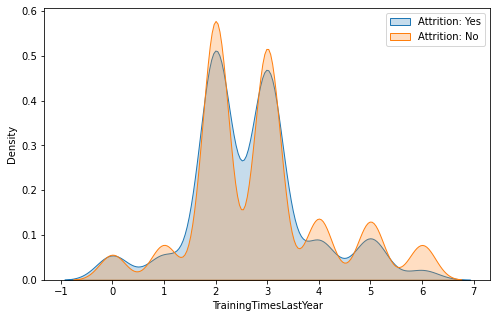

In [ ]:
training_yes = dataset[dataset['Attrition']=='Yes']['TrainingTimesLastYear']
training_no = dataset[dataset['Attrition']=='No']['TrainingTimesLastYear']

plt.figure(figsize = (8,5))
sns.kdeplot(data=training_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=training_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

In [ ]:
training_total = dataset['TrainingTimesLastYear'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['TrainingTimesLastYear'].value_counts()

training_perc = at_yes/job_level_total*100

print(round(training_perc,2))

0      NaN
1     1.84
2    17.60
3    39.45
4    15.09
5    24.64
6      NaN
dtype: float64


**YEARS AT COMPANY**

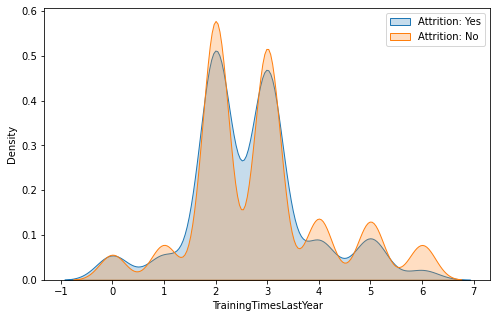

In [ ]:
training_yes = dataset[dataset['Attrition']=='Yes']['TrainingTimesLastYear']
training_no = dataset[dataset['Attrition']=='No']['TrainingTimesLastYear']

plt.figure(figsize = (8,5))
sns.kdeplot(data=training_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=training_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

In [ ]:
training_total = dataset['TrainingTimesLastYear'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['TrainingTimesLastYear'].value_counts()

training_perc = at_yes/training_total*100

print(round(training_perc,2))

0    18.52
1    14.08
2    17.18
3    17.52
4    13.01
5    14.29
6     6.15
Name: TrainingTimesLastYear, dtype: float64


**YEARS SINCE LAST PROMOTION**

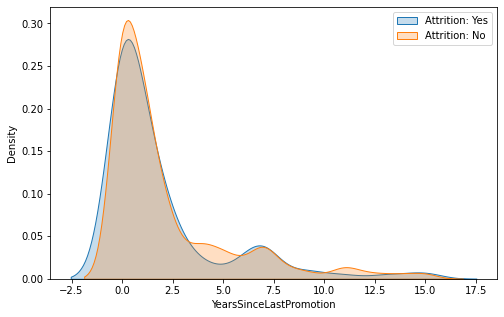

In [ ]:
promo_yes = dataset[dataset['Attrition']=='Yes']['YearsSinceLastPromotion']
promo_no = dataset[dataset['Attrition']=='No']['YearsSinceLastPromotion']

plt.figure(figsize = (8,5))
sns.kdeplot(data=promo_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=promo_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

In [ ]:
promo_total = dataset['YearsSinceLastPromotion'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['YearsSinceLastPromotion'].value_counts()

promo_perc = at_yes/promo_total*100

print(round(promo_perc,2))

0     18.93
1     13.73
2     16.98
3     17.31
4      8.20
5      4.44
6     18.75
7     21.05
8       NaN
9     23.53
10    16.67
11     8.33
12      NaN
13    20.00
14    11.11
15    23.08
Name: YearsSinceLastPromotion, dtype: float64


**YEARS WITH CURRENT MANAGER**

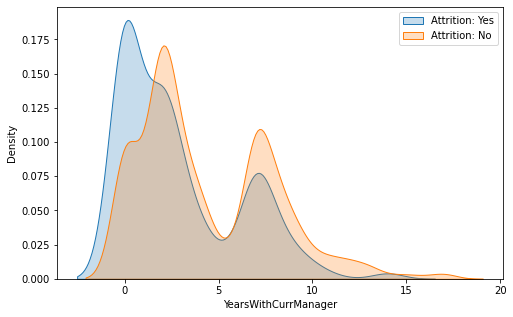

In [ ]:
curr_yes = dataset[dataset['Attrition']=='Yes']['YearsWithCurrManager']
curr_no = dataset[dataset['Attrition']=='No']['YearsWithCurrManager']

plt.figure(figsize = (8,5))
sns.kdeplot(data=curr_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=curr_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

In [ ]:
curr_total = dataset['YearsWithCurrManager'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['YearsWithCurrManager'].value_counts()

curr_perc = at_yes/curr_total*100

print(round(curr_perc,2))

0     32.32
1     14.47
2     14.53
3     13.38
4     11.22
5     12.90
6     13.79
7     14.35
8      9.35
9      9.38
10    11.11
11     4.55
12      NaN
13      NaN
14    40.00
15      NaN
16      NaN
17      NaN
Name: YearsWithCurrManager, dtype: float64


**ENVIRONMENT SATISFACTION**

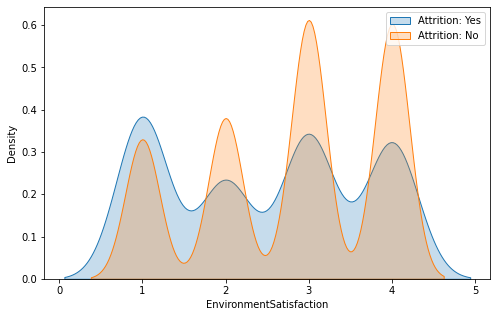

In [ ]:
sat_yes = dataset[dataset['Attrition']=='Yes']['EnvironmentSatisfaction']
sat_no = dataset[dataset['Attrition']=='No']['EnvironmentSatisfaction']

plt.figure(figsize = (8,5))
sns.kdeplot(data=sat_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=sat_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

**JOB SATISFACTION**

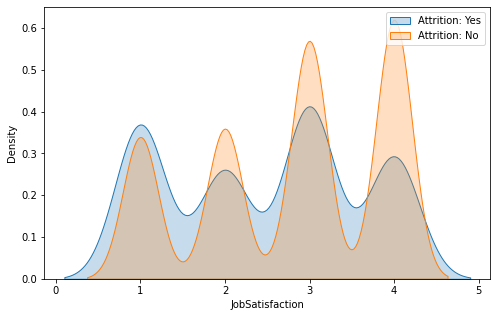

In [ ]:
sat_yes = dataset[dataset['Attrition']=='Yes']['JobSatisfaction']
sat_no = dataset[dataset['Attrition']=='No']['JobSatisfaction']

plt.figure(figsize = (8,5))
sns.kdeplot(data=sat_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=sat_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

**WORK LIFE BALANCE**

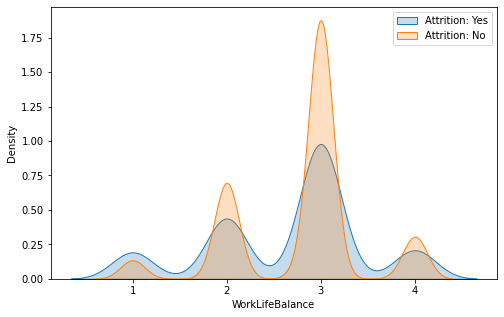

In [ ]:
balance_yes = dataset[dataset['Attrition']=='Yes']['WorkLifeBalance']
balance_no = dataset[dataset['Attrition']=='No']['WorkLifeBalance']

plt.figure(figsize = (8,5))
sns.kdeplot(data=balance_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=balance_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

**JOB INVOLVEMENT**

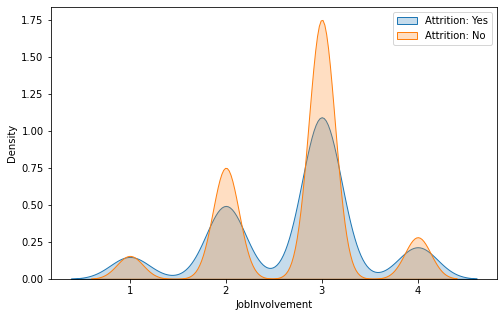

In [ ]:
involve_yes = dataset[dataset['Attrition']=='Yes']['JobInvolvement']
involve_no = dataset[dataset['Attrition']=='No']['JobInvolvement']

plt.figure(figsize = (8,5))
sns.kdeplot(data=involve_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=involve_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

**PERFORMANCE RATING**

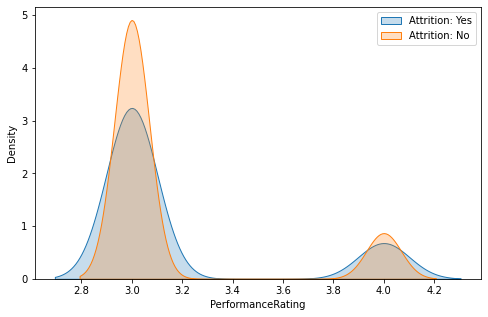

In [ ]:
balance_yes = dataset[dataset['Attrition']=='Yes']['PerformanceRating']
balance_no = dataset[dataset['Attrition']=='No']['PerformanceRating']

plt.figure(figsize = (8,5))
sns.kdeplot(data=balance_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=balance_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

##Splitting the Dataset

In [ ]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
cols = general_data.columns.tolist()
cols.remove('Attrition')
print(cols)

['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [ ]:
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', ]
X = general_data[cols]
y = general_data['Attrition']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Encoding Categorical Data

In [ ]:
!pip install category_encoders
import category_encoders as ce

     |████████████████████████████████| 81kB 6.2MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
encoder = ce.OneHotEncoder(cols=categorical_cols)
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)
X_train.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Age,BusinessTravel_1,BusinessTravel_2,BusinessTravel_3,Department_1,Department_2,Department_3,DistanceFromHome,Education,EducationField_1,EducationField_2,EducationField_3,EducationField_4,EducationField_5,EducationField_6,EmployeeCount,EmployeeID,Gender_1,Gender_2,JobLevel,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,JobRole_9,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,MonthlyIncome,NumCompaniesWorked,Over18_1,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
2736,26,1,0,0,1,0,0,4,4,1,0,0,0,0,0,1,2737,1,0,3,1,0,0,0,0,0,0,0,0,1,0,0,47890,7.0,1,20,8,1,5.0,2,2,0,0
1800,50,1,0,0,1,0,0,8,4,1,0,0,0,0,0,1,1801,0,1,2,1,0,0,0,0,0,0,0,0,1,0,0,49410,5.0,1,11,8,1,30.0,3,4,0,3
4173,36,1,0,0,1,0,0,1,3,1,0,0,0,0,0,1,4174,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,54860,7.0,1,12,8,1,10.0,2,5,0,3
2615,39,1,0,0,1,0,0,4,3,1,0,0,0,0,0,1,2616,0,1,2,1,0,0,0,0,0,0,0,0,0,1,0,98520,0.0,1,12,8,1,21.0,5,20,11,10
1775,25,1,0,0,1,0,0,8,3,1,0,0,0,0,0,1,1776,0,1,2,0,0,1,0,0,0,0,0,0,0,1,0,74840,1.0,1,15,8,0,6.0,3,6,1,4


In [ ]:
encoder = ce.OneHotEncoder(cols=['Attrition'])
y_train = encoder.fit_transform(y_train)
y_train.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Attrition_1,Attrition_2
2736,1,0
1800,1,0
4173,0,1
2615,1,0
1775,1,0


In [ ]:
del y_train["Attrition_2"]
y_train.head()

,Attrition_1
2736,1
1800,1
4173,0
2615,1
1775,1


## Feature Scaling

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

,Age,BusinessTravel_1,BusinessTravel_2,BusinessTravel_3,Department_1,Department_2,Department_3,DistanceFromHome,Education,EducationField_1,EducationField_2,EducationField_3,EducationField_4,EducationField_5,EducationField_6,EmployeeCount,EmployeeID,Gender_1,Gender_2,JobLevel,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,JobRole_9,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,MonthlyIncome,NumCompaniesWorked,Over18_1,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,-1.189641,0.643783,-0.485117,-0.337962,0.727738,-0.654607,-0.220249,-0.652441,1.070798,1.192031,-0.674467,-0.312956,-0.246203,-0.144894,-0.346782,0.0,0.416086,1.213857,-1.213857,0.849244,1.864126,-0.235665,-0.493660,-0.339072,-0.465033,-0.310035,-0.268903,-0.243427,-0.193203,1.074429,-0.685403,-0.525213,-0.355311,1.704213,0.0,1.296098,0.0,0.244864,-0.800054,-0.636600,-0.799585,-0.674827,-1.142665
1,1.453237,0.643783,-0.485117,-0.337962,0.727738,-0.654607,-0.220249,-0.156436,1.070798,1.192031,-0.674467,-0.312956,-0.246203,-0.144894,-0.346782,0.0,-0.319174,-0.823820,0.823820,-0.059345,1.864126,-0.235665,-0.493660,-0.339072,-0.465033,-0.310035,-0.268903,-0.243427,-0.193203,1.074429,-0.685403,-0.525213,-0.322852,0.907600,0.0,-1.160800,0.0,0.244864,2.410201,0.144854,-0.476961,-0.674827,-0.296667
2,-0.088442,0.643783,-0.485117,-0.337962,0.727738,-0.654607,-0.220249,-1.024445,0.083861,1.192031,-0.674467,-0.312956,-0.246203,-0.144894,-0.346782,0.0,1.544898,-0.823820,0.823820,-0.967934,-0.536444,4.243318,-0.493660,-0.339072,-0.465033,-0.310035,-0.268903,-0.243427,-0.193203,-0.930727,1.458995,-0.525213,-0.206469,1.704213,0.0,-0.887812,0.0,0.244864,-0.158003,-0.636600,-0.315649,-0.674827,-0.296667
3,0.241918,0.643783,-0.485117,-0.337962,0.727738,-0.654607,-0.220249,-0.652441,0.083861,1.192031,-0.674467,-0.312956,-0.246203,-0.144894,-0.346782,0.0,0.321036,-0.823820,0.823820,-0.059345,1.864126,-0.235665,-0.493660,-0.339072,-0.465033,-0.310035,-0.268903,-0.243427,-0.193203,-0.930727,1.458995,-0.525213,0.725871,-1.083931,0.0,-0.887812,0.0,0.244864,1.254509,1.707760,2.104032,2.730859,1.677330
4,-1.299761,0.643783,-0.485117,-0.337962,0.727738,-0.654607,-0.220249,-0.156436,0.083861,1.192031,-0.674467,-0.312956,-0.246203,-0.144894,-0.346782,0.0,-0.338812,-0.823820,0.823820,-0.059345,-0.536444,-0.235665,2.025684,-0.339072,-0.465033,-0.310035,-0.268903,-0.243427,-0.193203,-0.930727,1.458995,-0.525213,0.220195,-0.685625,0.0,-0.068846,0.0,-0.933835,-0.671644,0.144854,-0.154337,-0.365219,-0.014667


In [ ]:
X_train.isnull().values.any()

False

In [ ]:
X_train.columns[X_train.isna().any()].tolist()

[]

# Training the model

##Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predictions
Accuracy metrics used:


1.   Accuracy Score
2.   Confusion Matrix
3.   Classification Report



In [ ]:
encoder = ce.OneHotEncoder(cols=['Attrition'])
y_test = encoder.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
del y_test["Attrition_2"]
y_test.head()

,Attrition_1
1567,1
683,1
117,1
1581,1
3861,1


In [ ]:
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

##Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.8450
Training-set accuracy score: 0.8464


##Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
acc= (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
print('Accuracy = ',acc)

Confusion matrix

 [[  8 163]
 [  8 924]]

True Positives(TP) =  8

True Negatives(TN) =  924

False Positives(FP) =  163

False Negatives(FN) =  8
Accuracy =  0.8449682683590208


## Classification Report

In [ ]:
from sklearn.metrics import classification_report
cm = classification_report(y_test, y_pred)
print('Classification Report \n\n', cm)

Classification Report 

               precision    recall  f1-score   support

           0       0.50      0.05      0.09       171
           1       0.85      0.99      0.92       932

    accuracy                           0.84      1103
   macro avg       0.68      0.52      0.50      1103
weighted avg       0.80      0.84      0.79      1103



#Conclusion
Hence, by logistic regression, we get an accuracy of 84% approx. to determine if an employee will resign or not.

Of course, this result can be improved by using better classification algorithms like Random Forest Classifier, Support Vector Machine and more.